# Representation of signals & inverse problems - G1-G2

---
## Guidelines (read carefully before starting)

**Objective**: revision exercises about Python/numpy and the 2D discrete Fourier transform based on the Fast Fourier Transform (FFT) algorithm.

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (`Computer -> Documents/Python/`);
- unzip the archive `.zip`;
- rename the folder with the convention `lab0_Name1_Name2`;
- duplicate the notebook file and rename it with the convention `lab0_Name1_Name2.ipynb`;
- from Centrale Lille computers: at the end of the session, do not forget to transfer your work to your network space (do not leave your work on the C: drive).

## Contents <a id="content"></a>

1. [Exercise 1](#section1): A very short on `numpy` and `matplotlib` tutorial 
2. [Exercise 2](#section2): Fourier analysis of an image
   - [Question 1](#question1)
   - [Question 2](#question2) 
   - [Question 3](#question3) 
   - [Question 4](#question4)
   - [Bonus](#bonus)  

## Configuration 

In [80]:
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# Uncomment the next line if you want to be able to zoom on plots (one of the options below)
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## Exercise 1: A very short `numpy` and `matplotlib` tutorial <a id="section1"></a> [(&#8593;)](#content)

This section is devoted to refreshers/complements about the Python programming language, based on the [Scientific Python lecture](https://lectures.scientific-python.org/)

0. You can access the documentation of a specific Python function within a code cell by pressing `Maj+Tab+Tab` when the cursor is on the desired function. Try it out below

In [81]:
np.sum

<function numpy.sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>



1. If you are a true beginner in Python, go at least through [sections 1.2.1 to 1.2.5](https://lectures.scientific-python.org/intro/language/python_language.html) devoted to control flow instructions, functions and Python modules and packages.

2. `numpy` is a scientific computing library in Python. In particular, it offers conveninet, optimized routines for linear algebra (i.e., encode vector, matrices, tensors, on operations on it). 
   1. If you are new to `numpy`, go through sections [1.3.1 to 1.3.2]()
   2. Solve [exercise 1.3.5.1](https://lectures.scientific-python.org/intro/numpy/exercises.html#array-manipulations).

3. `matplotlib` is a Python library to display graphs and images. Take a quick look at [section 1.4](https://lectures.scientific-python.org/intro/matplotlib/index.html#simple-plot), mostly to identify how to make a simple plot and create subplots. Such instructions will be repeatedly used in the other labs.
> Indication: do not hesitate to take a look at the examples from the documentation, for example [here](https://matplotlib.org/stable/gallery/pyplots/pyplot_simple.html) and [there](https://matplotlib.org/stable/gallery/axes_grid1/demo_axes_divider.html).

In [82]:
## code playground

---
## Exercise 2: Fourier analysis of an image <a id="section2"></a> [(&#8593;)](#content)

### Loading an image

In [83]:
filename = "img/chessboard.png"
x = mpimg.imread(filename)
print("Image shape: {0}, maximum value: {1}".format(x.shape, np.max(x)))

Image shape: (512, 512), maximum value: 1.0


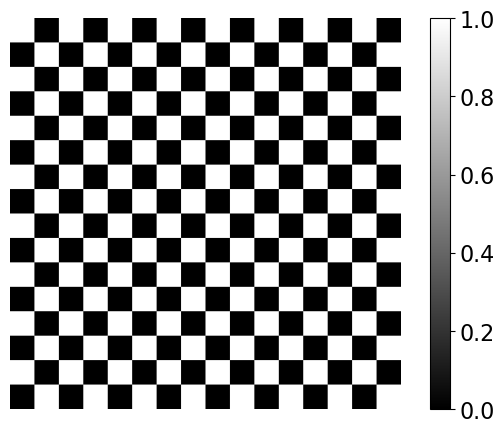

In [84]:
plt.figure()
plt.imshow(x, cmap="gray")
plt.tight_layout()
plt.colorbar()
plt.axis("off")
# plt.savefig(
#     "chessboard.pdf",
#     transparent=True,
#     bbox_inches="tight",
# )
plt.show()

### Displaying the absolute value Fourier coefficients

The function `np.fft.fftshift` ([documentation here](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html)) modifies the order of the coefficients so that the pixel associated with the (0, 0) frequency is located at the center of the image, for this question in position (256, 256). 

In [85]:
Fx = np.fft.fft2(x)
Fx_shift = np.fft.fftshift(Fx)

vmin = np.min(np.abs(Fx))
vmax = np.max(np.abs(Fx))

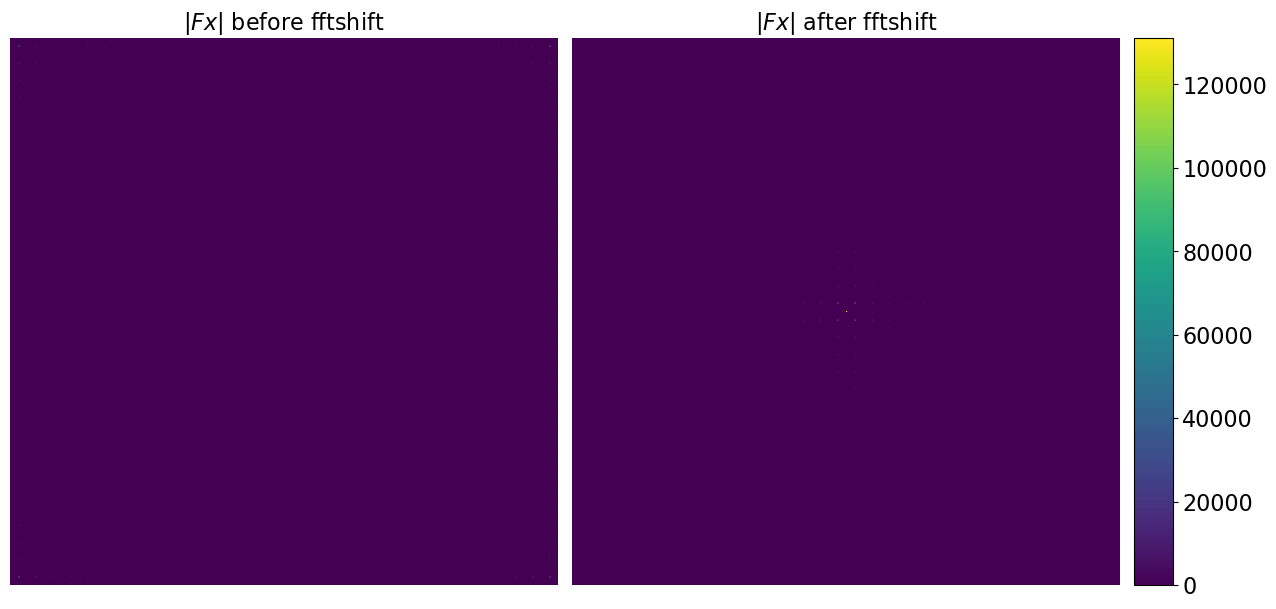

In [86]:
fig = plt.figure(figsize=(15, 30))
axs = ImageGrid(
    fig,
    111,
    nrows_ncols=(1, 2),
    axes_pad=0.15,
    share_all=True,
    cbar_location="right",
    cbar_mode="single",
    cbar_size="7%",
    cbar_pad=0.15,
)
axs[0].imshow(np.abs(Fx), vmin=vmin, vmax=vmax, cmap=plt.get_cmap("viridis"))
axs[0].set_title(r"$|Fx|$ before fftshift")
axs[0].axis("off")

obj = axs[1].imshow(
    np.abs(Fx_shift), vmin=vmin, vmax=vmax, cmap=plt.get_cmap("viridis")
)
axs[1].set_title(r"$|Fx|$ after fftshift")
axs[1].axis("off")
axs[1].cax.colorbar(obj)
plt.show()

### Question 1  <a id="question1"></a> [(&#8593;)](#content)
What do you notice with the above figure? Is it relevant? How could it possibly be improved?

> *Indication*: zoom on the center of the image. Describe what you observe and comment.

- <p style="color:rgb(137, 207, 240);">Your answers</p>

This signal is essentially a 2D square wave, so it has infinite decreasing odd harmonics of the fundamental frequency. This can be observed on the image of the Fourier transform by the decreasing modules of the image's components.

---
To improve the contrast, we will adopt a logarithmic scale to dislay intensity of the pixels: `norm=mpl.colors.LogNorm()`

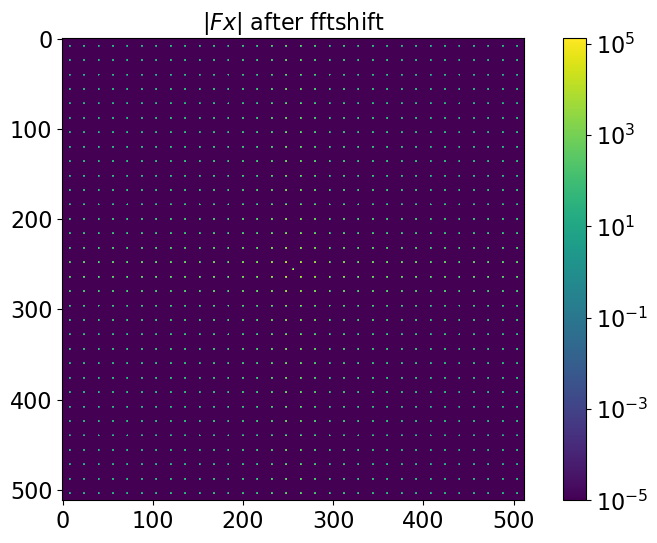

In [87]:
plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(Fx_shift),
    cmap="viridis",
    norm=mpl.colors.LogNorm(vmin=1e-5, vmax=vmax, clip=True),
)
plt.title(r"$|Fx|$ after fftshift")
plt.colorbar()
plt.show()

### Question 2 <a id="question2"></a> [(&#8593;)](#content)

2.1. Take a look at the images from the `img` folder. Display the absolute value of the Fourier transform for 2 different images (if you selected a color (RGB) image, select only one of the slice). A color image is encoded in Python through a 3D `array` 3D, with the dimensions 0 and 1 corresponding to the spatial dimensions, and the dimension 2 gathering the 3 color channels (read (R), green (G), blue (B)). 

- Observe the bright pixels at the center of many of the figures representing the absolute value of the Fourier transform of a natural image. 

- What can you conclude about the distribution of the signal's energy in the 2D frequency plane?

- Comment on the distribution of high intensity pixels in the Fourier domain, and relate you observations to the spatial content of the image (*i.e.*, in the original domain)?

2.2\. Check numerically that the 2D Fourier transform is separable, *i.e.*, that it can be computed with the successive application of two 1D Fourier transforms, along the horizontal axis and then the vertical axis (or in the opposite order).

> **Hint**:
> ```python
> # To successively apply a 1D Fourier transform along one axis:
> Fx_1d = np.fft.fft(x, n=None, axis=0, norm=None)   # vertical 1D FFT
> Fx_1d = np.fft.fft(Fx_1d, n=None, axis=1, norm=None)  # horizontal 1D FFT
> # Fx = # using directly a 2D FFT...
> ```
> Compare the 2 results, e.g., by computing the Frobenius norm between `Fx` and `Fx_1d`.

2.3\. Build an image composed of black and white stripes, and study its Fourier transform. Modify the size of the stripes, and comment on your obsevations.
> **Hint**: building an image with vertical stripes 16-pixels wide:
>
>   ```python
>   vertical_stripe = np.concatenate((np.ones([512,16]), np.zeros([512,16])), axis=1)
>   vertical_stripes = np.tile(vertical_stripe, (1,16))
>   ```

2.4\. Define a $512 \times 512$ matrix containing only zeros. Set to 1 two pixels located in two positions which are symmetric with respect to the center of the image. Take the inverse Fourier transform of this image (using `np.fft.ifftshift` and `np.fft.ifft2`). Observe et comment.

- <p style="color:rgb(137, 207, 240);">Your answers</p>

2.1 The energy at exactaly the center of the image is equivalent to the average of the pixels of the image (frequency = 0). The Horizontal lines represent the energy of the Fourirer transform when considering the singnals of the image vertically (x fixed) and the vertical lines represent the energy of the Fourirer transform when considering the signal sof the image horizontally (y fixed). 

Image shape: (498, 495), maximum value: 1.0


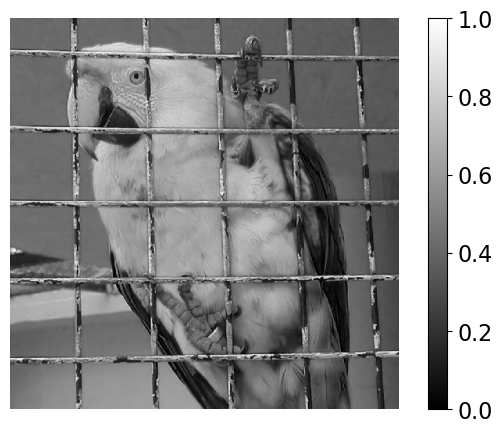

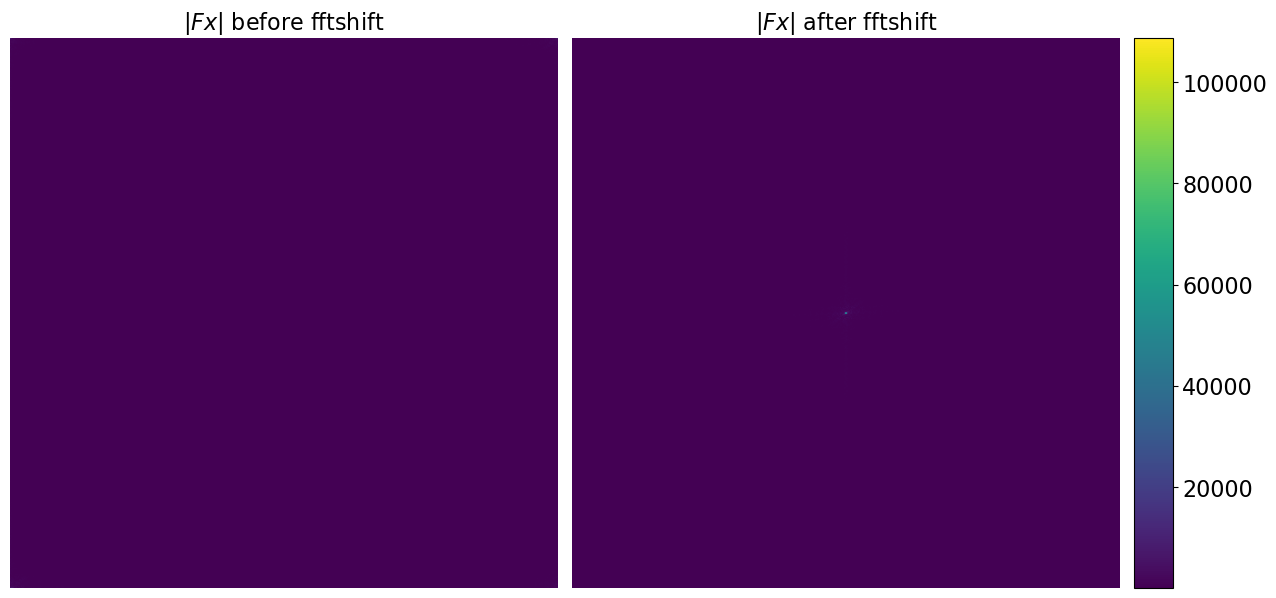

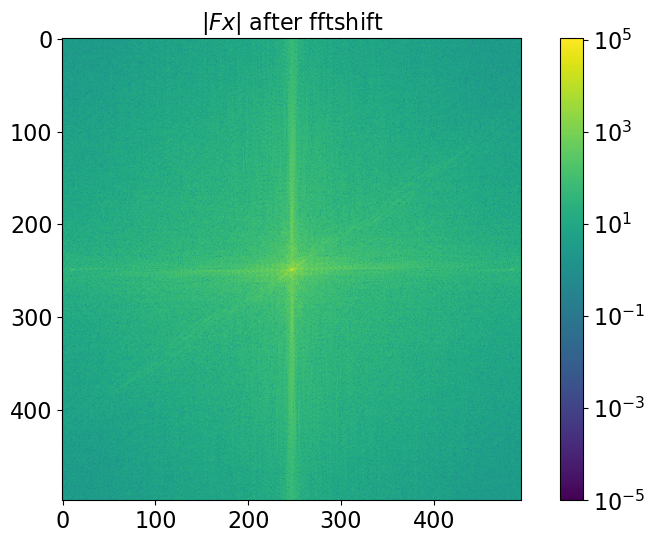

In [88]:
# your codes (illustration of your comments)
#filename = "img/periodic_bumps.png"
filename = "img/parrot.png"
x = mpimg.imread(filename)
print("Image shape: {0}, maximum value: {1}".format(x.shape, np.max(x)))

plt.figure()
plt.imshow(x, cmap="gray")
plt.tight_layout()
plt.colorbar()
plt.axis("off")
# plt.savefig(
#     "chessboard.pdf",
#     transparent=True,
#     bbox_inches="tight",
# )
plt.show()

Fx = np.fft.fft2(x)
Fx_shift = np.fft.fftshift(Fx)

vmin = np.min(np.abs(Fx))
vmax = np.max(np.abs(Fx))

fig = plt.figure(figsize=(15, 30))
axs = ImageGrid(
    fig,
    111,
    nrows_ncols=(1, 2),
    axes_pad=0.15,
    share_all=True,
    cbar_location="right",
    cbar_mode="single",
    cbar_size="7%",
    cbar_pad=0.15,
)
axs[0].imshow(np.abs(Fx), vmin=vmin, vmax=vmax, cmap=plt.get_cmap("viridis"))
axs[0].set_title(r"$|Fx|$ before fftshift")
axs[0].axis("off")

obj = axs[1].imshow(
    np.abs(Fx_shift), vmin=vmin, vmax=vmax, cmap=plt.get_cmap("viridis")
)
axs[1].set_title(r"$|Fx|$ after fftshift")
axs[1].axis("off")
axs[1].cax.colorbar(obj)
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(Fx_shift),
    cmap="viridis",
    norm=mpl.colors.LogNorm(vmin=1e-5, vmax=vmax, clip=True),
)
plt.title(r"$|Fx|$ after fftshift")
plt.colorbar()
plt.show()

Image shape: (512, 512), maximum value: 1.0


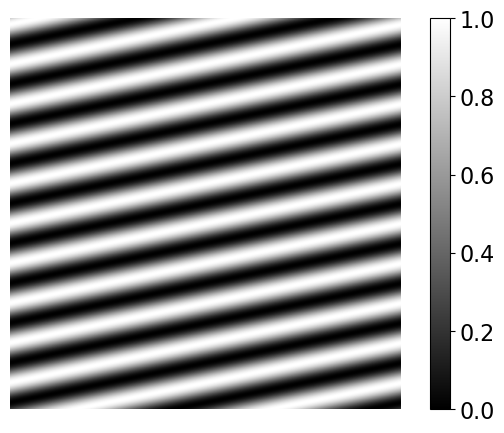

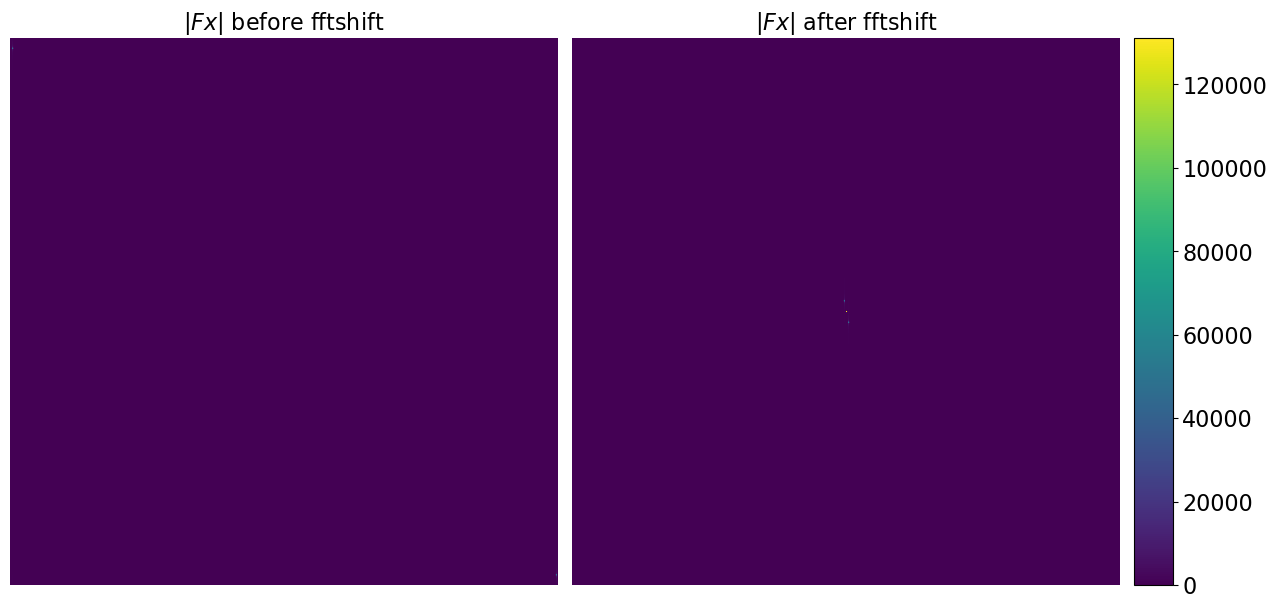

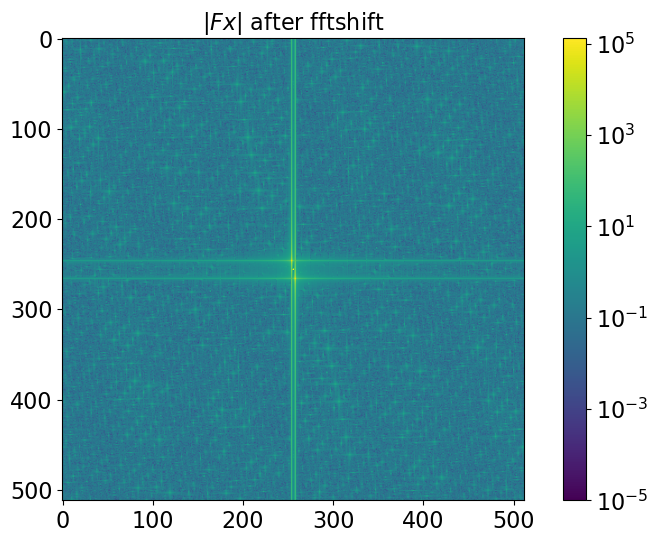

In [89]:
# your codes (illustration of your comments)
filename = "img/grating.png"
x = mpimg.imread(filename)
print("Image shape: {0}, maximum value: {1}".format(x.shape, np.max(x)))

plt.figure()
plt.imshow(x, cmap="gray")
plt.tight_layout()
plt.colorbar()
plt.axis("off")
# plt.savefig(
#     "chessboard.pdf",
#     transparent=True,
#     bbox_inches="tight",
# )
plt.show()

Fx = np.fft.fft2(x)
Fx_shift = np.fft.fftshift(Fx)

vmin = np.min(np.abs(Fx))
vmax = np.max(np.abs(Fx))

fig = plt.figure(figsize=(15, 30))
axs = ImageGrid(
    fig,
    111,
    nrows_ncols=(1, 2),
    axes_pad=0.15,
    share_all=True,
    cbar_location="right",
    cbar_mode="single",
    cbar_size="7%",
    cbar_pad=0.15,
)
axs[0].imshow(np.abs(Fx), vmin=vmin, vmax=vmax, cmap=plt.get_cmap("viridis"))
axs[0].set_title(r"$|Fx|$ before fftshift")
axs[0].axis("off")

obj = axs[1].imshow(
    np.abs(Fx_shift), vmin=vmin, vmax=vmax, cmap=plt.get_cmap("viridis")
)
axs[1].set_title(r"$|Fx|$ after fftshift")
axs[1].axis("off")
axs[1].cax.colorbar(obj)
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(Fx_shift),
    cmap="viridis",
    norm=mpl.colors.LogNorm(vmin=1e-5, vmax=vmax, clip=True),
)
plt.title(r"$|Fx|$ after fftshift")
plt.colorbar()
plt.show()

----
### Question 3 <a id="question3"></a> [(&#8593;)](#content)

3.1 Compare the Fourier transform of an image `x` and `y = x - np.mean(x)` (`y` has zero mean). Some helper code is provided below.

3.2 Comment specifically on the amplitude of the frequency component (0, 0).

In [90]:
filename = "img/chessboard.png"
x = mpimg.imread(filename)
y = x - np.mean(x)

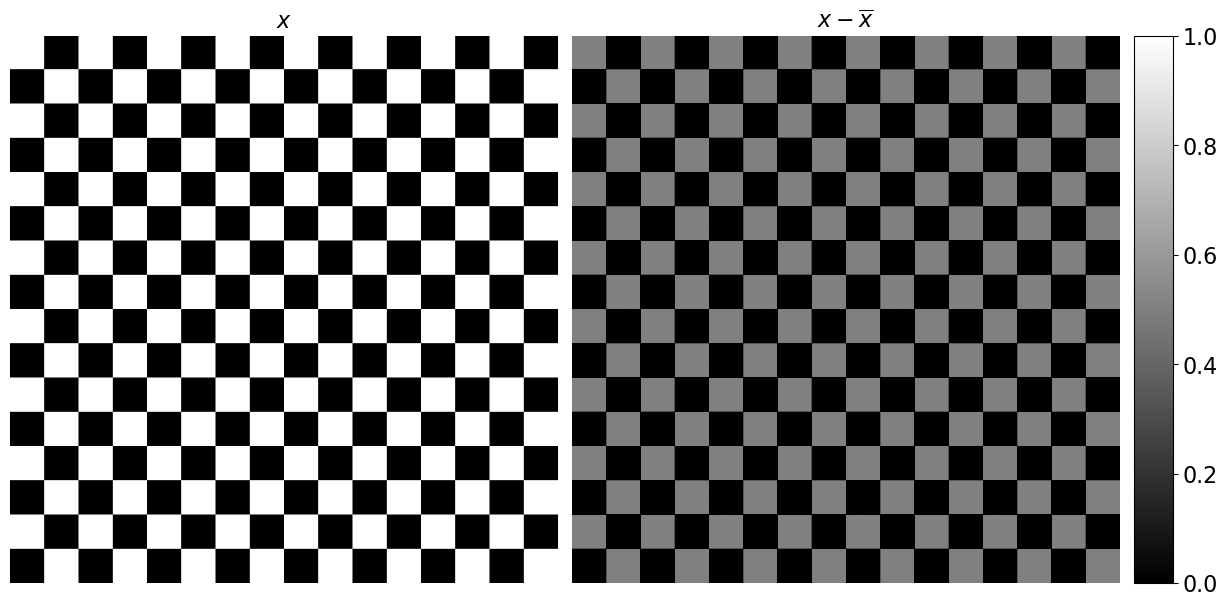

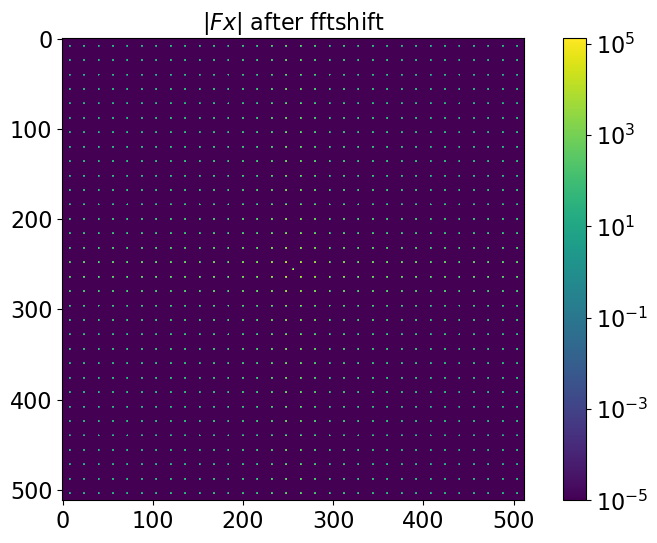

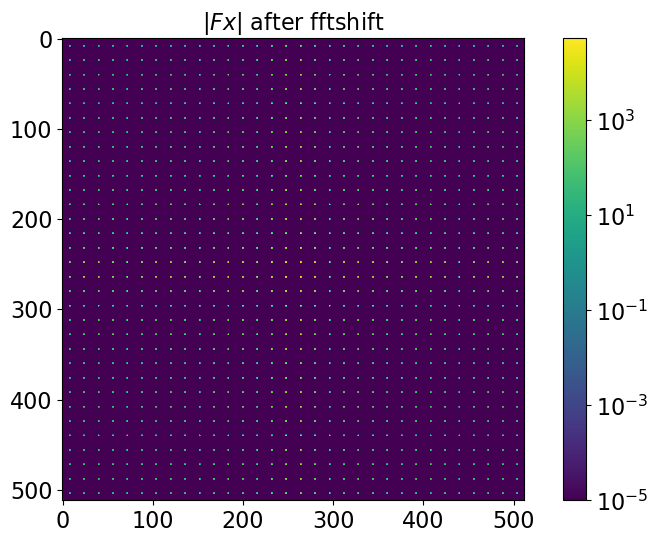

In [91]:
fig = plt.figure(figsize=(15, 30))

vmin = np.min(x)
vmax = np.max(x)

axs = ImageGrid(
    fig,
    111,
    nrows_ncols=(1, 2),
    axes_pad=0.15,
    share_all=True,
    cbar_location="right",
    cbar_mode="single",
    cbar_size="7%",
    cbar_pad=0.15,
)
axs[0].imshow(x, vmin=vmin, vmax=vmax, cmap=plt.get_cmap("gray"))
axs[0].set_title(r"$x$")
axs[0].axis("off")

vmin = np.min(x)
vmax = np.max(x)

obj = axs[1].imshow(y, vmin=vmin, vmax=vmax, cmap=plt.get_cmap("gray"))
axs[1].set_title(r"$x - \overline{x}$")
axs[1].axis("off")
axs[1].cax.colorbar(obj)
plt.show()

Fx = np.fft.fft2(x)
Fx_shift = np.fft.fftshift(Fx)

vmin = np.min(np.abs(Fx))
vmax = np.max(np.abs(Fx))

plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(Fx_shift),
    cmap="viridis",
    norm=mpl.colors.LogNorm(vmin=1e-5, vmax=vmax, clip=True),
)
plt.title(r"$|Fx|$ after fftshift")
plt.colorbar()
plt.show()


# y
Fx = np.fft.fft2(y)
Fx_shift = np.fft.fftshift(Fx)

vmin = np.min(np.abs(Fx))
vmax = np.max(np.abs(Fx))

plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(Fx_shift),
    cmap="viridis",
    norm=mpl.colors.LogNorm(vmin=1e-5, vmax=vmax, clip=True),
)
plt.title(r"$|Fx|$ after fftshift")
plt.colorbar()
plt.show()

- <p style="color:rgb(137, 207, 240);">Your answers</p>

The frequency component of the element (0, 0) becomes null. This component represent the "average"/"DC component" of the signal. 

----
### Question 4 <a id="question4"></a> [(&#8593;)](#content)

Let us define 2 square masks `H1` and `H2` directly in the Fourier domain.

In [92]:
H1 = np.zeros([512, 512])
delta = 32
H1[256 - delta : 256 + delta, 256 - delta : 256 + delta] = 1
H2 = 1 - H1

4.1. Load any image in a variable `x`. Reconstruct the images `x1` and `x2` obtained by computing the inverse discrete Fourier transform of `H1*Fx` et `H2*Fx`, where `Fx` contains the discrete Fourier transform of `x`. 

4.2. Which operation have you just encoded? 

4.3. Observe the result of this operation on the `mandrill.png` image, and comment your observations.

- <p style="color:rgb(137, 207, 240);">Your answer to question 2</p>
- <p style="color:rgb(137, 207, 240);">Your answer to question 3</p>

Image shape: (512, 512), maximum value: 0.9019607901573181


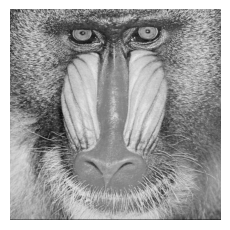

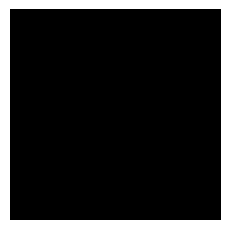

In [96]:
# codes

# your codes (illustration of your comments)
filename = "img/mandrill.png"
x = mpimg.imread(filename)
print("Image shape: {0}, maximum value: {1}".format(x.shape, np.max(x)))

plt.figure(figsize=(5, 3))
plt.imshow(x, cmap="gray")
plt.tight_layout()
plt.axis("off")
# plt.savefig(
#     "chessboard.pdf",
#     transparent=True,
#     bbox_inches="tight",
# )
plt.show()


Fx = np.fft.fft2(x)
Fx_shift = np.fft.fftshift(Fx)

vmin = np.min(np.abs(Fx))
vmax = np.max(np.abs(Fx))

x1 = np.fft.ifftshift(H1*Fx_shift)
#x1 = np.fft.ifftshift(H2*Fx_shift)
#x1 = np.fft.ifft2(x1)

vmin = np.min(np.abs(x1))
vmax = np.max(np.abs(x1))

plt.figure(figsize=(5, 3))
plt.imshow( np.abs(x1), cmap="gray" )
plt.tight_layout()
plt.axis("off")
#plt.title(r"$|Fx|$ after filter")

plt.show()



---
### Bonus <a id="bonus"></a> [(&#8593;)](#content)

Implement an isotropic version of the ideal low-pass and high-pass filters from exercise 2. This will correspond to replacing the rectangular filter template by a circular one, of radius `fc` (with `fc` the cutting frequency).

<p style="color:rgb(137, 207, 240);">Your answers</p>

In [94]:
# associated codes

H1 = np.zeros([512, 512])
delta = 32
center = 256
fc = 16

for y in range(512):
    for x in range(512):
        distance_x = abs(center - x)
        distance_y = abs(center - y)
        ditance = (distance_x^2.0 + distance_y^2.0)^(0.5)
        H1[x,y] = 1.0 
        

H1[1, 1] = 0;

plt.figure(figsize=(5, 3))
plt.imshow( np.abs(H1), cmap="gray" )
plt.tight_layout()
plt.axis("off")


#H1[256 - delta : 256 + delta, 256 - delta : 256 + delta] = 1


TypeError: unsupported operand type(s) for ^: 'int' and 'float'